## Datathon 2- Group 1
##### Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

##### Import file

In [13]:
df = pd.read_csv('datathon2_HF.csv')
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     hypertension  platelets  serum_creatinine  serum_sodium  sex  smoking 

##### Data Pre-Processing

In [15]:
#Delete any missing rows
df = df.dropna()
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     hypertension  platelets  serum_creatinine  serum_sodium  sex  smoking 

In [16]:
#Remove time 
df = df.drop(columns=['time'])
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     hypertension  platelets  serum_creatinine  serum_sodium  sex  smoking 

In [18]:
#Round to nearest integer (age and platelets)
df['age'] = df['age'].round(0)
df['platelets'] = df['platelets'].round(0)
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     hypertension  platelets  serum_creatinine  serum_sodium  sex  smoking 

In [19]:
# Categorical variables: Count and percentages
#Binary or Categorical
fe_count = df['anaemia'].value_counts()
fe_percentage = (df['anaemia'].value_counts(normalize=True) * 100).round(2)

diab_count = df['diabetes'].value_counts()
diab_percentage = (df['diabetes'].value_counts(normalize=True) * 100).round(2)

hyperten_count = df['hypertension'].value_counts()
hyperten_percentage = (df['hypertension'].value_counts(normalize=True) * 100).round(2)

sex_count = df['sex'].value_counts()
sex_percentage = (df['sex'].value_counts(normalize=True) * 100).round(2)

smoking_count = df['smoking'].value_counts()
smoking_percentage = (df['smoking'].value_counts(normalize=True) * 100).round(2)

hf_count = df['hf_mortality'].value_counts()
hf_percentage = (df['hf_mortality'].value_counts(normalize=True) * 100).round(2)
# Table
fe_table = pd.DataFrame({
    'Count': fe_count,
    'Percentage': fe_percentage
})
diab_table = pd.DataFrame({
    'Count': diab_count,
    'Percentage': diab_percentage
})
hyperten_table = pd.DataFrame({
    'Count': hyperten_count,
    'Percentage': hyperten_percentage
})
sex_table = pd.DataFrame({
    'Count': sex_count,
    'Percentage': sex_percentage
})
smokinng_table = pd.DataFrame({
    'Count': smoking_count,
    'Percentage': smoking_percentage
})
hf_table = pd.DataFrame({
    'Count': hf_count,
    'Percentage': hf_percentage
})

print(fe_table)
print(diab_table)
print(hyperten_table)
print(sex_table)
print(smokinng_table)
print(hf_table)

         Count  Percentage
anaemia                   
0          170       56.86
1          129       43.14
          Count  Percentage
diabetes                   
0           174       58.19
1           125       41.81
              Count  Percentage
hypertension                   
0               194       64.88
1               105       35.12
     Count  Percentage
sex                   
1      194       64.88
0      105       35.12
         Count  Percentage
smoking                   
0          203       67.89
1           96       32.11
              Count  Percentage
hf_mortality                   
0               203       67.89
1                96       32.11



Mean and Standard Deviation for Continuous Variables:
        age  creatinine_phosphokinase  ejection_fraction  platelets  \
mean  60.84                    581.84              38.08  263358.03   
std   11.89                    970.29              11.83   97804.24   

      serum_creatinine  serum_sodium  
mean              1.39        136.63  
std               1.03          4.41  


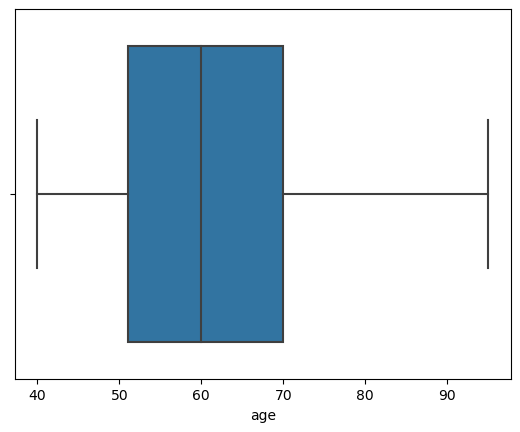

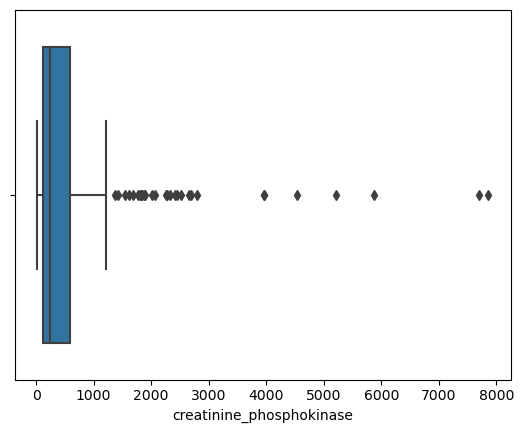

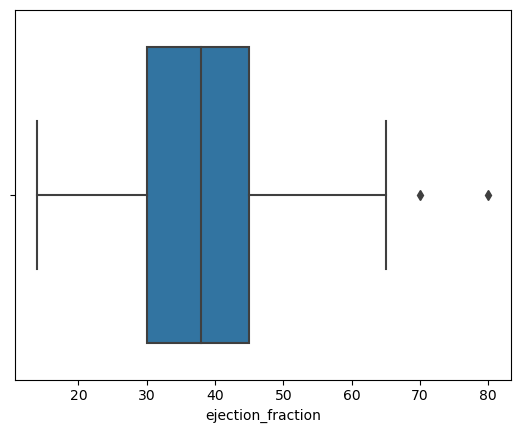

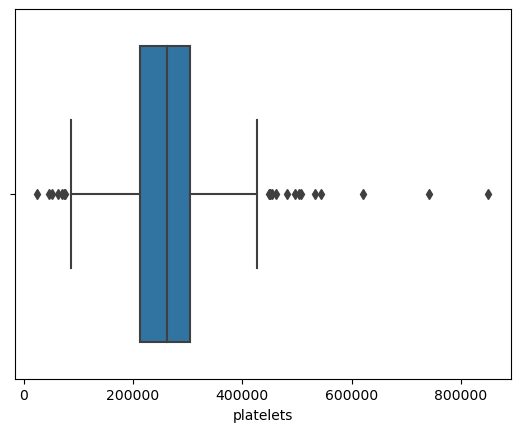

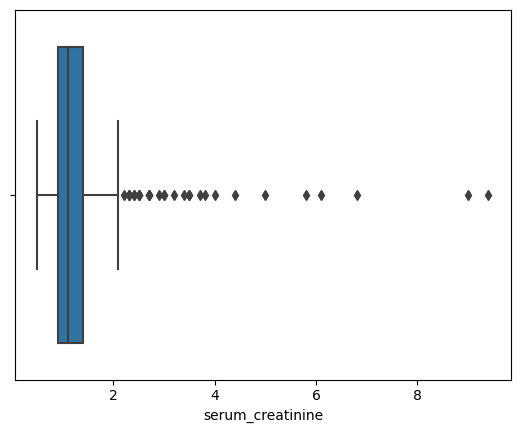

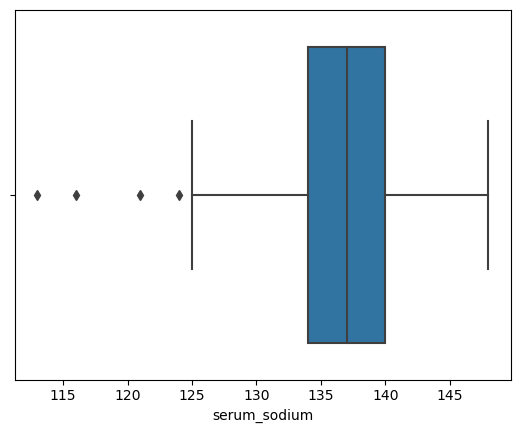

In [22]:
# Continuous variables: Means and SD, boxplots to indentify outliers
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
mean_sd = df[continuous_vars].agg(['mean', 'std']).round(2)

print("\nMean and Standard Deviation for Continuous Variables:")
print(mean_sd)

sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['creatinine_phosphokinase'])
plt.show()

sns.boxplot(x=df['ejection_fraction'])
plt.show()

sns.boxplot(x=df['platelets'])
plt.show()

sns.boxplot(x=df['serum_creatinine'])
plt.show()

sns.boxplot(x=df['serum_sodium'])
plt.show()

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
6    75.0        1                       246         0                 15   
8    65.0        0                       157         0                 65   
..    ...      ...                       ...       ...                ...   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
298  50.0        0                       196         0                 45   

     hypertension  platelets  serum_creatinine  serum_sodium  sex  smoking 

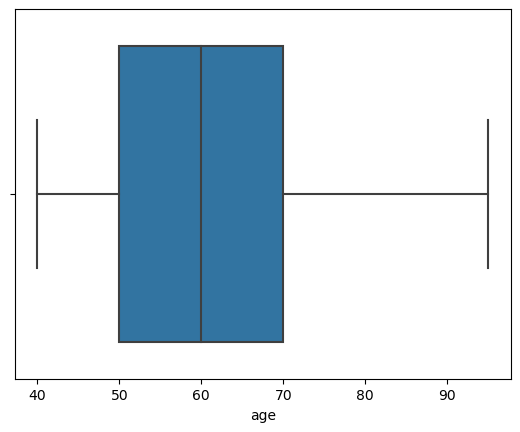

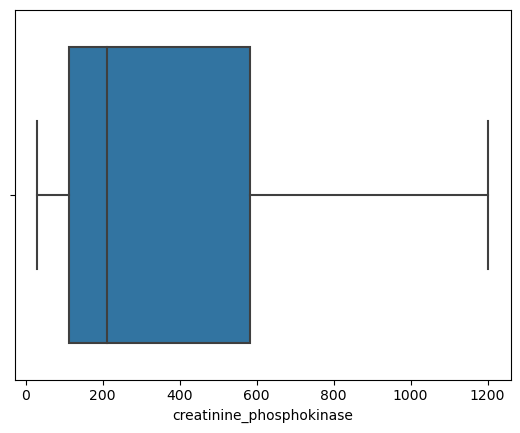

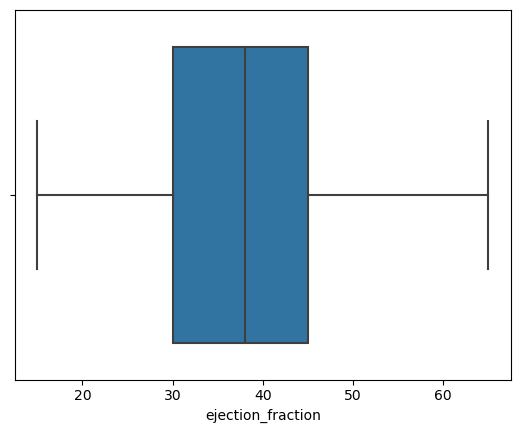

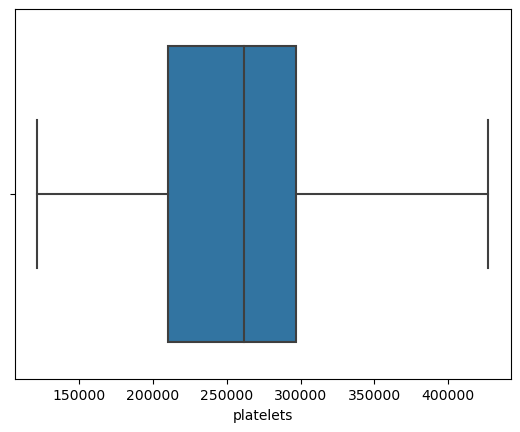

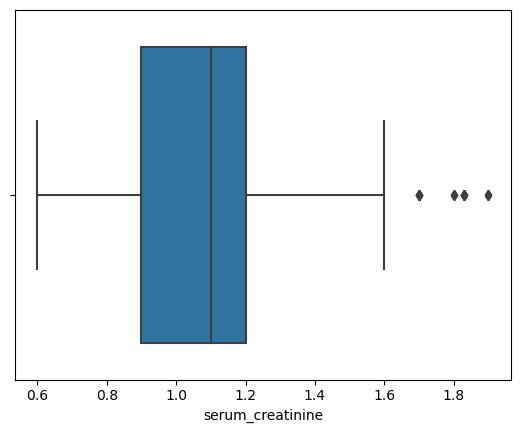

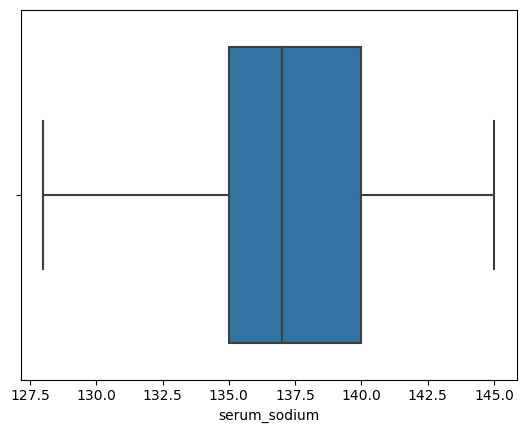

In [ ]:
# List of variables with outliers
variables_with_outliers = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Remove outliers for each variable
for var in variables_with_outliers:
    Q1 = df[var].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[var].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                # Interquartile range
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame
    df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

print(df)

#Double check the distribution of variables
sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['creatinine_phosphokinase'])
plt.show()

sns.boxplot(x=df['ejection_fraction'])
plt.show()

sns.boxplot(x=df['platelets'])
plt.show()

sns.boxplot(x=df['serum_creatinine'])
plt.show()

sns.boxplot(x=df['serum_sodium'])
plt.show()

In [25]:
#Export final dataset
# df.to_csv('final_df_datathon2.csv', index=False)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.053322                  0.035996   
anaemia                   0.053322  1.000000                 -0.209603   
creatinine_phosphokinase  0.035996 -0.209603                  1.000000   
diabetes                 -0.040359 -0.014486                 -0.018063   
ejection_fraction         0.064873 -0.005367                 -0.121659   
hypertension              0.114865  0.008688                  0.002057   
platelets                -0.106799  0.012384                  0.011928   
serum_creatinine          0.226272 -0.025618                  0.113614   
serum_sodium             -0.015344  0.097464                 -0.064523   
sex                       0.024227 -0.112571                 -0.061284   
smoking                  -0.009763 -0.164778                 -0.037454   
hf_mortality              0.300429  0.067802                  0.062826   

                          diabetes  e

/Users/chantellelin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


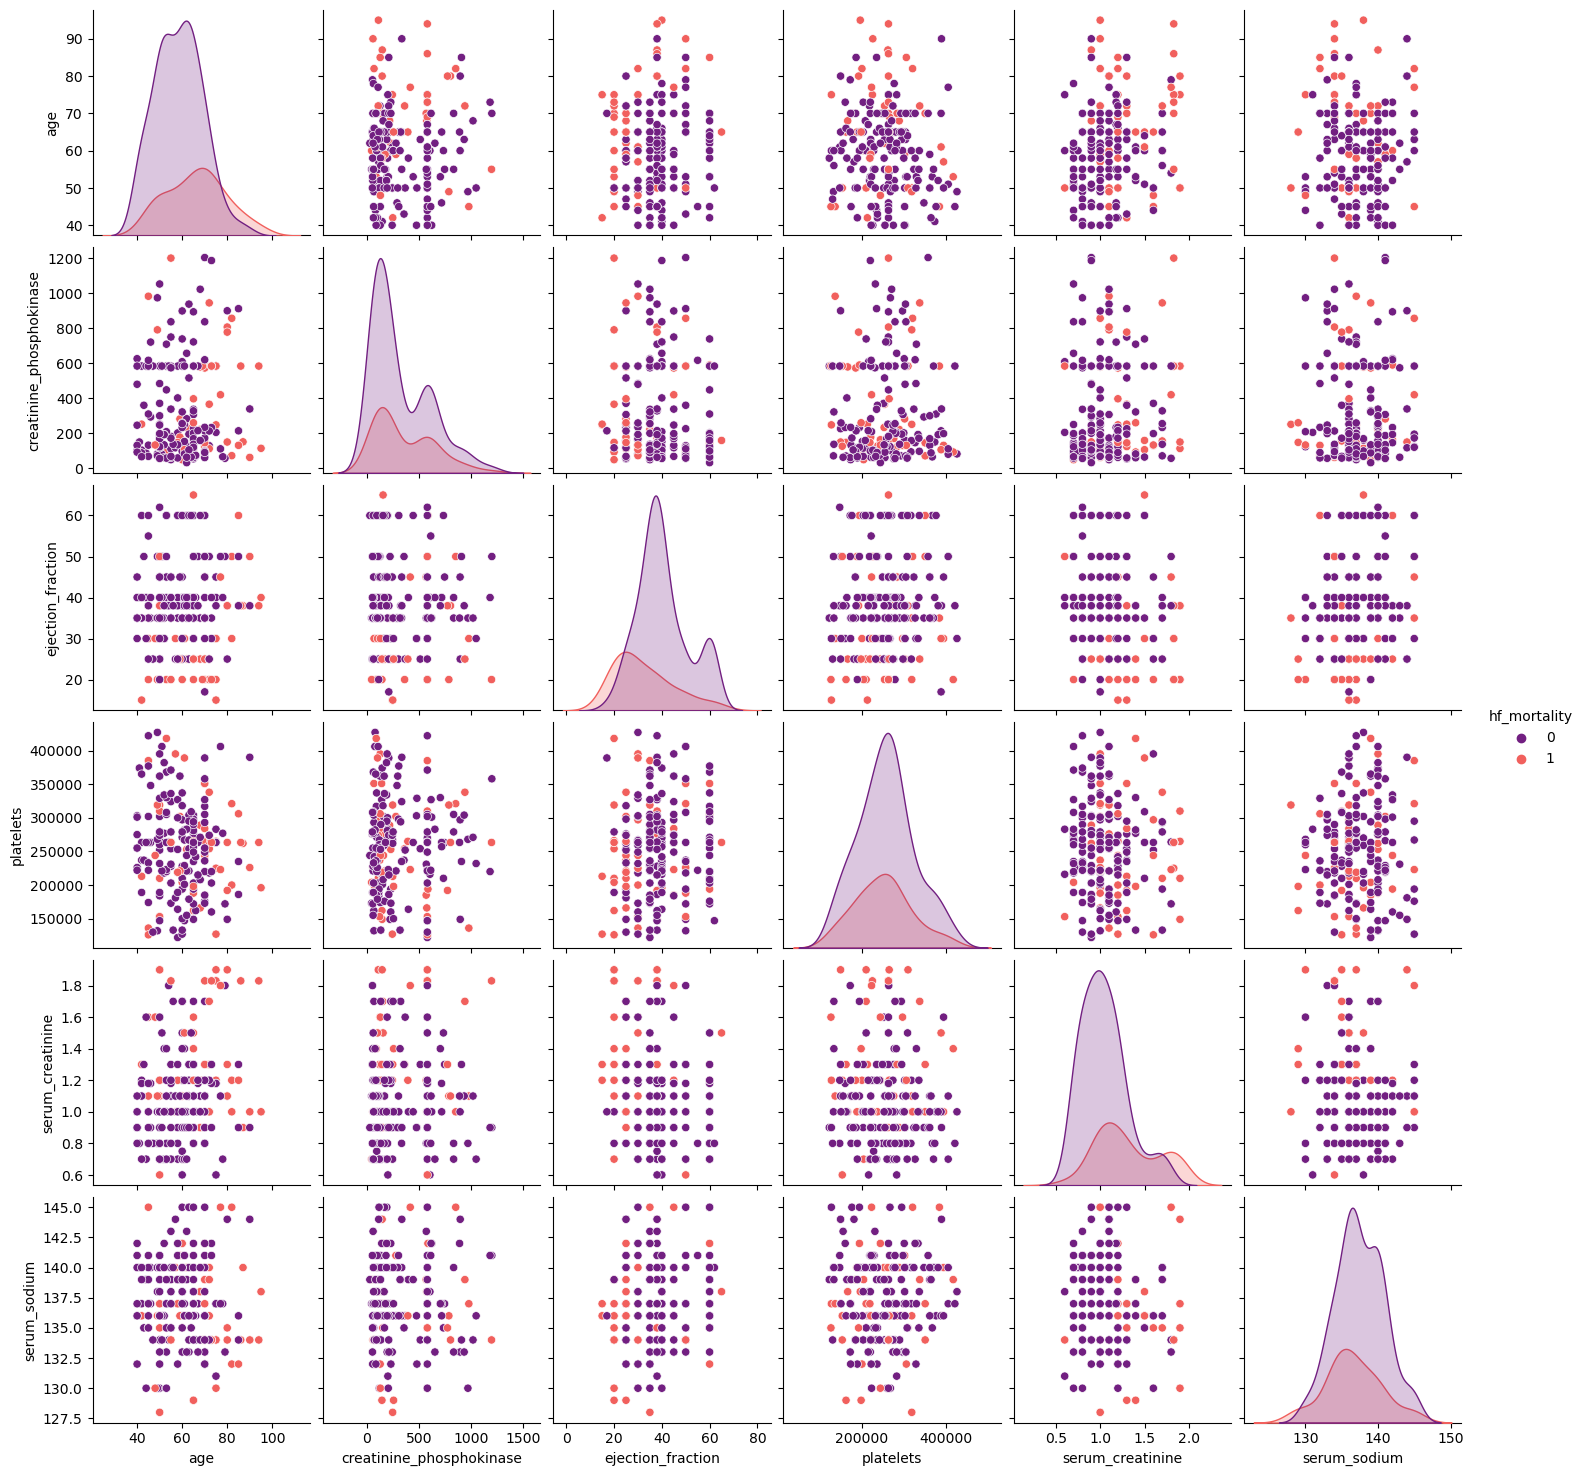

In [34]:
#Covariance Matrix
correlation_matrix = df.corr()
print(correlation_matrix)

sns.pairplot(
    df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'hf_mortality']], 
    hue='hf_mortality', 
    palette="magma"
)
plt.show()

##### Machine Learning Implementation

In [70]:
#split data
X = df.drop('hf_mortality', axis=1)
y = df['hf_mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

#regularization L1 and run model
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (173, 11)
Shape of X_test: (44, 11)


##### Performance

Confusion Matrix:
[[29  4]
 [ 5  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.60      0.55      0.57        11

    accuracy                           0.80        44
   macro avg       0.73      0.71      0.72        44
weighted avg       0.79      0.80      0.79        44



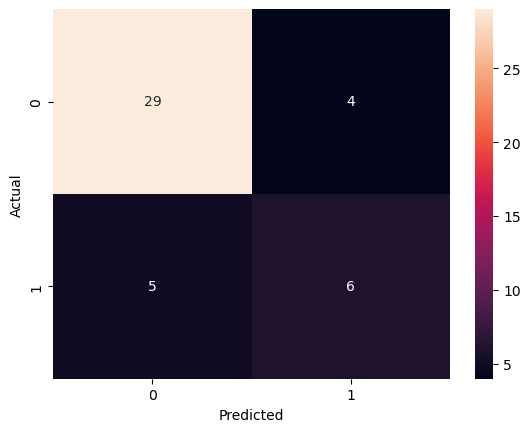

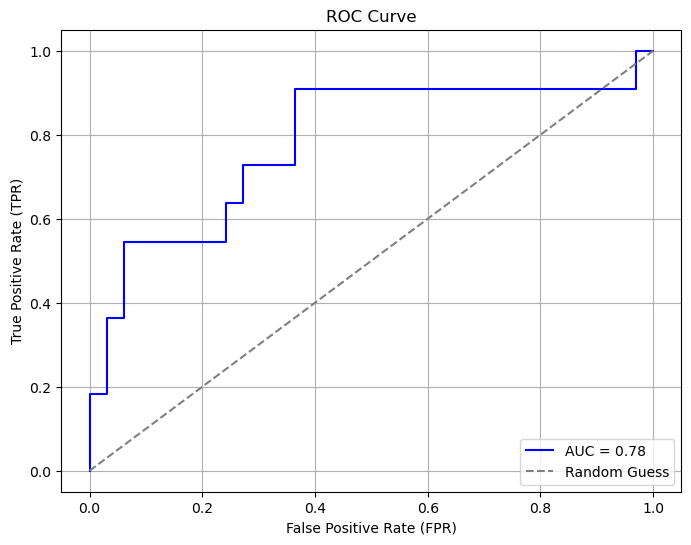

In [71]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)
y_pred_probs = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Plot AUC
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate the AUC
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [68]:
#create equation
import statsmodels.api as sm

# Separate features and target variable
X = df.drop('hf_mortality', axis=1)
y = df['hf_mortality']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.430487
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           hf_mortality   No. Observations:                  217
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                           11
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.2643
Time:                        14:39:47   Log-Likelihood:                -93.416
converged:                       True   LL-Null:                       -126.97
Covariance Type:            nonrobust   LLR p-value:                 4.303e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.2931      7.516     -0.438      0.661     -18.024